#Cuestiones generales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Train set

In [2]:
id = '1VvZp2MML5dLce79TMsrCQm5VkvQn93zN'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_identity.csv')

train_identity = pd.read_csv('train_identity.csv')

In [3]:
id = '18ZAaojp_783CfnqhNj43w1vgwZOH221D'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_transaction.csv')

train_transaction = pd.read_csv('train_transaction.csv')

Mergeo los dos datasets que tengo

In [4]:
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [5]:
ids = df[['TransactionID']]

In [6]:
df.drop(columns=['TransactionID'], inplace=True)

In [7]:
df.head(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,19.0,NaN,yahoo.com,NaN,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,12.0,2.0,61.0,61.0,30.0,318.0,30.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Na

Limpio la RAM

In [8]:
train_transaction = None
train_identity = None

#Test set

In [9]:
id = '11-pP9l-0FTW9A1pwrb2nVeAoV8Awf4oY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_transaction.csv')

test_transaction = pd.read_csv('test_transaction.csv')

In [10]:
id = '1xHLcsTe2619N38GI9O9QzPV74XRrUKbx'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_identity.csv')

test_identity = pd.read_csv('test_identity.csv')

Mergeo los dos datasets que tengo

In [11]:
df_test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [12]:
ids_test = df_test[['TransactionID']]

In [13]:
df_test.drop(columns=['TransactionID'], inplace=True)

In [14]:
df_test.head(10)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,18403323,57.95,W,12839,321.0,150.0,visa,226.0,debit,512.0,87.0,NaN,NaN,gmail.com,NaN,5.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0,4.0,36.0,36.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18403350,87.00,W,16560,476.0,150.0,visa,126.0,debit,110.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18403387,390.00,W,15066,170.0,150.0,mastercard,102.0,credit,194.0,87.0,303.0,NaN,gmail.com,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,11.0,1.0,NaN,NaN,NaN,126.0,4.0,NaN,NaN,NaN,NaN,126.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18403405,103.95,W,2803,100.0,150.0,visa,226.0,debit,494.0,87.0,3.0,NaN,gmail.com,NaN,152.0,148.0,0.0,0.0,135.0,95.0,0.0,0.0,77.0,0.0,122.0,0.0,407.0,108.0,128.0,128.0,13.0,644.0,13.0,NaN,NaN,NaN,NaN,106.0,631.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18403416,117.00,W,12544,321.0,150.0,visa,226.0,debit,476.0,87.0,8.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,8.0,2.0,69.0,69.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,68.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Limpio la RAM

In [15]:
test_transaction = None
test_identity = None

#Creo el validation set

Dejo un 30% del dataset original como validation set

In [16]:
len(df.index)

590540

In [17]:
validation = df.loc[0:(0.3 * len(df.index)), :]

In [18]:
len(validation.index)

177163

In [19]:
train = df.loc[(0.3 * len(df.index)):len(df.index), :]

In [20]:
len(train.index)

413378

In [21]:
train.head(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
177162,0,3864166,39.00,W,10447,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,1.0,182.0,182.0,6.0,182.0,6.0,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177163,1,3864195,49.00,W,1802,555.0,150.0,visa,226.0,debit,170.0,87.0,NaN,NaN,gmail.com,NaN,2.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,4.0,0.0,3.0,1.0,3.0,3.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177164,0,3864205,102.00,W,2114,396.0,150.0,mastercard,224.0,debit,315.0,87.0,NaN,NaN,NaN,NaN,13.0,20.0,0.0,0.0,1.0,6.0,0.0,0.0,9.0,0.0,9.0,0.0,53.0,10.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177165,1,3864212,24.00,W,10057,225.0,150.0,mastercard,224.0,debit,269.0,87.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177166,0,3864218,422.50,W,16659,170.0,150.0,visa,226.0,credit,264.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177167,0,3864222,25.95,W,13052,254.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,gmail.com,NaN,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,22.0,4.0,121.0,121.0,12.0,158.0,12.0,NaN,NaN,NaN,NaN,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177168,0,3864228,221.99,W,13864,561.0,150.0,visa,226.0,debit,123.0,87.0,NaN,NaN,gmail.com,NaN,2.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,48.0,48.0,48.0,48.0,48.0,NaN,NaN,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177169,0,3864242,35.95,W,4501,390.0,150.0,mastercard,224.0,debit,498.0,87.0,NaN,NaN,gmail.com,NaN,83.0,67.0,0.0,0.0,188.0,50.0,0.0,0.0,58.0,0.0,63.0,0.0,488.0,68.0,102.0,102.0,7.0,338.0,21.0,NaN,NaN,NaN,NaN,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177170,0,3864249,117.00,W,9500,321.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,NaN,NaN,282.0,282.0,NaN,NaN,NaN,NaN,282.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177171,0,3864277,209.95,W,7826,481.0,150.0,mastercard,224.0,debit,494.0,87.0,4.0,NaN,NaN,NaN,154.0,135.0,0.0,0.0,145.0,105.0,0.0,0.0,92.0,0.0,106.0,0.0,477.0,123.0,53.0,53.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [22]:
validation.head(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,19.0,NaN,yahoo.com,NaN,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0,0.0,12.0,2.0,61.0,61.0,30.0,318.0,30.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Na

Limpio la RAM

In [23]:
df = None

#Me aseguro que las columnas de train, validation y test tengan los mismos índices

In [24]:
a = train.columns
a

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)

In [25]:
a = a.drop('isFraud')

In [26]:
a

Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=432)

In [27]:
df_test.columns = a

In [28]:
df_test.columns

Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=432)

#Encoding

Aplico mean encoding a todas las columnas

In [29]:
for c in train.columns:
  if c == 'isFraud':
    continue

  if (train[c].dtype.kind not in 'biufc'): #si no es numérica la columna
      mean_encoded_subject = train.groupby(c)['isFraud'].mean().to_dict()

      train[c] =  train[c].map(mean_encoded_subject)
      validation[c] = validation[c].map(mean_encoded_subject)
      df_test[c] = df_test[c].map(mean_encoded_subject)

  aux = train[c].mean()
  train[c].fillna(aux, inplace=True)
  validation[c].fillna(aux, inplace=True)
  df_test[c].fillna(aux, inplace=True)

In [30]:
df_test.head(10)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,18403224,31.95,0.021053,10409,111.0,150.0,0.038016,226.0,0.025510,170.0,87.0,1.00000,226.707442,0.045380,0.107195,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.000000,419.000000,27.000000,398.000000,27.000000,75.469764,37.282984,131.031119,0.553722,418.0,203.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
1,18403263,49.00,0.021053,4272,111.0,150.0,0.038016,226.0,0.025510,299.0,87.0,4.00000,226.707442,0.024539,0.107195,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.000000,149.000000,7.000000,634.000000,7.000000,75.469764,37.282984,131.031119,0.553722,231.0,634.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
2,18403310,171.00,0.021053,4476,574.0,150.0,0.038016,226.0,0.025510,472.0,87.0,2635.00000,226.707442,0.055550,0.107195,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.000000,137.000000,10.000000,97.000000,10.000000,75.469764,37.282984,131.031119,0.553722,136.0,136.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
3,18403310,284.95,0.021053,10989,360.0,150.0,0.038016,166.0,0.025510,205.0,87.0,17.00000,226.707442,0.045380,0.107195,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.000000,42.000000,41.000000,242.000000,41.000000,75.469764,37.282984,131.031119,0.553722,242.0,242.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
4,18403317,67.95,0.021053,18018,452.0,150.0,0.035411,117.0,0.025510,264.0,87.0,6.00000,226.707442,0.045380,0.107195,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.000000,22.000000,0.000000,22.000000,0.000000,75.469764,37.282984,131.031119,0.553722,22.0,22.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
5,18403323,57.95,0.021053,12839,321.0,150.0,0.038016,226.0,0.025510,512.0,87.0,116.06686,226.707442,0.045380,0.107195,5.0,5.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0,4.0,36.000000,36.000000,35.000000

In [31]:
train.head(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
177162,0,3864166,39.00,0.021053,10447,490.0,150.0,0.038016,226.0,0.025510,315.0,87.0,116.06686,226.707442,0.025593,0.107195,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,1.0,182.0,182.000000,6.000000,182.000000,6.000000,75.469764,37.282984,131.031119,0.553722,6.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
177163,1,3864195,49.00,0.021053,1802,555.0,150.0,0.038016,226.0,0.025510,170.0,87.0,116.06686,226.707442,0.045380,0.107195,2.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,4.0,0.0,3.0,1.0,3.0,3.000000,0.000000,2.000000,0.000000,75.469764,37.282984,131.031119,0.553722,2.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
177164,0,3864205,102.00,0.021053,2114,396.0,150.0,0.035411,224.0,0.025510,315.0,87.0,116.06686,226.707442,0.038933,0.107195,13.0,20.0,0.0,0.0,1.0,6.0,0.0,0.0,9.0,0.0,9.0,0.0,53.0,10.0,6.0,6.000000,0.000000,144.315713,42.567771,75.469764,37.282984,131.031119,0.553722,114.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
177165,1,3864212,24.00,0.021053,10057,225.0,150.0,0.035411,224.0,0.025510,269.0,87.0,116.06686,226.707442,0.038933,0.107195,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,2.000000,1.000000,144.315713,42.567771,75.469764,37.282984,131.031119,0.553722,3.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
177166,0,3864218,422.50,0.021053,16659,170.0,150.0,0.038016,226.0,0.080659,264.0,87.0,116.06686,226.707442,0.045380,0.107195,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,171.361941,28.115415,0.000000,42.567771,75.469764,37.282984,131.031119,0.553722,0.0,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.07671,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
177167,0,3864222,25.95,0.021053,13052,254.0,150.0,0.038016,226.0,0.025510,325.0,87.0,116.06686,226.707442,0.045380,0.107195,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,22.0,4.0,121.0,121.000000,12.000000,158.000000,12.000000,75.469764,3

In [32]:
validation.head(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,86400,68.5,0.021053,13926,360.037841,150.0,0.099141,142.0,0.080659,315.0,87.0,19.00000,226.707442,0.038933,0.107195,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,171.361941,13.000000,144.315713,42.567771,75.469764,37.282984,131.031119,0.553722,13.000000,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.076710,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
1,0,86401,29.0,0.021053,2755,404.000000,150.0,0.035411,102.0,0.080659,325.0,87.0,116.06686,226.707442,0.045380,0.107195,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,171.361941,28.115415,0.000000,42.567771,75.469764,37.282984,131.031119,0.553722,0.000000,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.076710,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
2,0,86469,59.0,0.021053,4663,490.000000,150.0,0.038016,166.0,0.025510,330.0,87.0,287.00000,226.707442,0.102670,0.107195,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,171.361941,28.115415,0.000000,42.567771,75.469764,37.282984,131.031119,0.553722,0.000000,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.076710,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
3,0,86499,50.0,0.021053,18132,567.000000,150.0,0.035411,117.0,0.025510,476.0,87.0,116.06686,226.707442,0.025593,0.107195,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.000000,0.000000,75.469764,37.282984,131.031119,0.553722,84.000000,...,-11.591049,201644.93882,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,99.773942,0.108306,48.518003,-339.278514,0.109691,0.110087,196.754465,14.379886,349.094953,416.232534,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.109648,0.109648,0.075285,0.109763,26.216168,0.076710,0.075925,0.109691,0.109691,0.109691,0.109691,0.109621,0.104684
4,0,86506,50.0,0.095829,4497,514.000000,150.0,0.035411,102.0,0.080659,420.0,87.0,116.06686,226.707442,0.045380,0.107195,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,171.361941,28.115415,144.315713,42.567771,75.469764,37.282984,131.031119,0.553722,127.338443,...,0.000000,70787.00000,0.053851,-0.05761,1.388039,-7.17967,12.118863,-37.951643,0.070348,-0.274654,100.000000,0.114087,48.518003,-480.000000,0.071957,0.071221,166.000000,14.379886,542.000000,144.000000,367.312224,16.509919,0.1205,12.635556,332.540971,148.895105,0.1205,0.072922,0.072281,0.133484,0.109137,32.000000,0.092105,0.067213,0.075777,0.111923,0.113097,0.080204,0.131292,0.000000
5,0,86510,49.0,0.021053,5937,555.000000,150.0,0.038016,226.0,0.025510,272.0,87.0,36.00000,226.707442,0.045380,0.107195,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,171.361941,28.115415,0.000000,42.567771,75.

#Entrenamiento del modelo

Separo labels y points en train set

In [ ]:
points_train = train.drop(columns=['isFraud'])
labels_train = pd.DataFrame(train['isFraud'])

Utilizo la librería sklearn para hacer una regresión logística con los mejores parámetros posibles

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
lr = LogisticRegression(random_state=13, solver='lbfgs', max_iter=200)

In [ ]:
parametros = [
              {
                  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                  'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              }
]

In [ ]:
model = RandomizedSearchCV(lr, param_distributions=parametros, n_iter=7, random_state=13, scoring='roc_auc', n_jobs=1, verbose=100)

Busco el mejor modelo posible

In [ ]:
model.fit(points_train, labels_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START C=10, penalty=l2............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5; 1/7] END .............C=10, penalty=l2;, score=0.722 total time=  59.5s
[CV 2/5; 1/7] START C=10, penalty=l2............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/7] END .............C=10, penalty=l2;, score=0.733 total time=  41.2s
[CV 3/5; 1/7] START C=10, penalty=l2............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 1/7] END .............C=10, penalty=l2;, score=0.732 total time=  45.2s
[CV 4/5; 1/7] START C=10, penalty=l2............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5; 1/7] END .............C=10, penalty=l2;, score=0.696 total time=  60.0s
[CV 5/5; 1/7] START C=10, penalty=l2............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5; 1/7] END .............C=10, penalty=l2;, score=0.744 total time= 1.0min
[CV 1/5; 2/7] START C=0.1, penalty=none.........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 1/5; 2/7] END ..........C=0.1, penalty=none;, score=0.732 total time=  57.3s
[CV 2/5; 2/7] START C=0.1, penalty=none.........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 2/5; 2/7] END ..........C=0.1, penalty=none;, score=0.730 total time= 1.0min
[CV 3/5; 2/7] START C=0.1, penalty=none.........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 3/5; 2/7] END ..........C=0.1, penalty=none;, score=0.732 total time= 1.0min
[CV 4/5; 2/7] START C=0.1, penalty=none.........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 4/5; 2/7] END ..........C=0.1, penalty=none;, score=0.694 total time= 1.1min
[CV 5/5; 2/7] START C=0.1, penalty=none.........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 5/5; 2/7] END ..........C=0.1, penalty=none;, score=0.746 total time= 1.0min
[CV 1/5; 3/7] START C=1, penalty=l2.............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5; 3/7] END ..............C=1, penalty=l2;, score=0.731 total time=  57.8s
[CV 2/5; 3/7] START C=1, penalty=l2.............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5; 3/7] END ..............C=1, penalty=l2;, score=0.737 total time= 1.0min
[CV 3/5; 3/7] START C=1, penalty=l2.............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5; 3/7] END ..............C=1, penalty=l2;, score=0.752 total time= 1.0min
[CV 4/5; 3/7] START C=1, penalty=l2.............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5; 3/7] END ..............C=1, penalty=l2;, score=0.695 total time= 1.0min
[CV 5/5; 3/7] START C=1, penalty=l2.............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5; 3/7] END ..............C=1, penalty=l2;, score=0.743 total time= 1.0min
[CV 1/5; 4/7] START C=0.0001, penalty=l2........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 4/7] END .........C=0.0001, penalty=l2;, score=0.729 total time=  47.6s
[CV 2/5; 4/7] START C=0.0001, penalty=l2........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5; 4/7] END .........C=0.0001, penalty=l2;, score=0.727 total time=  59.2s
[CV 3/5; 4/7] START C=0.0001, penalty=l2........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5; 4/7] END .........C=0.0001, penalty=l2;, score=0.732 total time= 1.1min
[CV 4/5; 4/7] START C=0.0001, penalty=l2........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5; 4/7] END .........C=0.0001, penalty=l2;, score=0.693 total time= 1.1min
[CV 5/5; 4/7] START C=0.0001, penalty=l2........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5; 4/7] END .........C=0.0001, penalty=l2;, score=0.744 total time= 1.0min
[CV 1/5; 5/7] START C=0.001, penalty=none.......................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 1/5; 5/7] END ........C=0.001, penalty=none;, score=0.732 total time=  57.6s
[CV 2/5; 5/7] START C=0.001, penalty=none.......................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 2/5; 5/7] END ........C=0.001, penalty=none;, score=0.730 total time= 1.0min
[CV 3/5; 5/7] START C=0.001, penalty=none.......................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 3/5; 5/7] END ........C=0.001, penalty=none;, score=0.732 total time=  58.7s
[CV 4/5; 5/7] START C=0.001, penalty=none.......................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 4/5; 5/7] END ........C=0.001, penalty=none;, score=0.694 total time= 1.0min
[CV 5/5; 5/7] START C=0.001, penalty=none.......................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 5/5; 5/7] END ........C=0.001, penalty=none;, score=0.746 total time= 1.0min
[CV 1/5; 6/7] START C=10, penalty=none..........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 1/5; 6/7] END ...........C=10, penalty=none;, score=0.732 total time=  57.5s
[CV 2/5; 6/7] START C=10, penalty=none..........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 2/5; 6/7] END ...........C=10, penalty=none;, score=0.730 total time= 1.0min
[CV 3/5; 6/7] START C=10, penalty=none..........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 3/5; 6/7] END ...........C=10, penalty=none;, score=0.732 total time= 1.0min
[CV 4/5; 6/7] START C=10, penalty=none..........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 4/5; 6/7] END ...........C=10, penalty=none;, score=0.694 total time= 1.1min
[CV 5/5; 6/7] START C=10, penalty=none..........................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CON

[CV 5/5; 6/7] END ...........C=10, penalty=none;, score=0.746 total time= 1.1min
[CV 1/5; 7/7] START C=0.01, penalty=l1..........................................
[CV 1/5; 7/7] END .............C=0.01, penalty=l1;, score=nan total time=   0.4s
[CV 2/5; 7/7] START C=0.01, penalty=l1..........................................
[CV 2/5; 7/7] END .............C=0.01, penalty=l1;, score=nan total time=   0.4s
[CV 3/5; 7/7] START C=0.01, penalty=l1..........................................
[CV 3/5; 7/7] END .............C=0.01, penalty=l1;, score=nan total time=   0.4s
[CV 4/5; 7/7] START C=0.01, penalty=l1..........................................
[CV 4/5; 7/7] END .............C=0.01, penalty=l1;, score=nan total time=   0.4s
[CV 5/5; 7/7] START C=0.01, penalty=l1..........................................
[CV 5/5; 7/7] END .............C=0.01, penalty=l1;, score=nan total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver l

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=13),
                   n_iter=7, n_jobs=1,
                   param_distributions=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                               100],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none']}],
                   random_state=13, scoring='roc_auc', verbose=100)

Obtengo cuáles son los hiperparámetros que mejor se adaptan al modelo

In [ ]:
model.best_estimator_

LogisticRegression(C=1, max_iter=200, random_state=13)

Reporte para el train set:

In [ ]:
print(classification_report(labels_train, model.predict(points_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    397741
           1       0.00      0.00      0.00     15637

    accuracy                           0.96    413378
   macro avg       0.48      0.50      0.49    413378
weighted avg       0.93      0.96      0.94    413378



In [ ]:
roc_auc_score(labels_train, model.predict_proba(points_train)[:, 1])

0.6968719945463535

Separo labels y points en validation set

In [ ]:
points_validation = validation.drop(columns=['isFraud'])
labels_validation = pd.DataFrame(validation['isFraud'])

Reporte para el validation set:

In [ ]:
print(classification_report(labels_validation, model.predict(points_validation)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    172137
           1       0.01      0.00      0.00      5026

    accuracy                           0.97    177163
   macro avg       0.49      0.50      0.49    177163
weighted avg       0.94      0.97      0.96    177163



El mejor score de validación obtenido es:

In [ ]:
roc_auc_score(labels_validation, model.predict_proba(points_validation)[:, 1])

0.6284466894134733

#Logistic Regression


In [33]:
points_train = train.drop(columns=['isFraud'])
labels_train = pd.DataFrame(train['isFraud'])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(C=1, max_iter=200, random_state=13)

In [36]:
lr.fit(points_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=200, random_state=13)

#Importancia de features

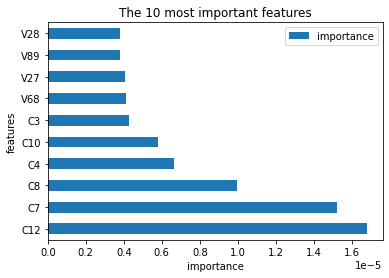

In [37]:
import math

feature_importance = pd.DataFrame(list(points_train.columns), columns = ['feature'])

coef = abs(lr.coef_[0])
promedios = np.mean(points_train).tolist()

feature_importance['importance'] = coef / promedios
feature_importance = feature_importance.sort_values(by = ['importance'], ascending=False)
 
ax = feature_importance.head(10).plot.barh(x='feature', y='importance')
plt.xlabel('importance')
plt.ylabel('features')
plt.title('The 10 most important features')
plt.show()

#Predicciones

In [38]:
predictions = lr.predict_proba(df_test)[:, 1]

In [39]:
df_predictions = pd.DataFrame(list(predictions))

In [40]:
df_predictions['TransactionID'] = ids_test

In [41]:
df_predictions.columns = ['isFraud', 'TransactionID']

In [42]:
df_predictions.head(10)

,isFraud,TransactionID
0,0.008157,3663549
1,0.011057,3663550
2,0.012674,3663551
3,0.009084,3663552
4,0.007259,3663553
5,0.008751,3663554
6,0.008101,3663555
7,0.008263,3663556
8,0.011468,3663557
9,0.008529,3663558


In [43]:
df_predictions = df_predictions[['TransactionID', 'isFraud']]

In [44]:
df_predictions.head(10)

,TransactionID,isFraud
0,3663549,0.008157
1,3663550,0.011057
2,3663551,0.012674
3,3663552,0.009084
4,3663553,0.007259
5,3663554,0.008751
6,3663555,0.008101
7,3663556,0.008263
8,3663557,0.011468
9,3663558,0.008529


In [45]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [46]:
df_predictions.to_csv('LOGISTIC_REGRESSION.csv', index=False)
!cp LOGISTIC_REGRESSION.csv "drive/My Drive/"

El score obtenido en la competencia es 0.717790